# This code takes in a .csv file that was generated by for_rose_3.ijm (code that iterates over each image of a Nissl series in Image J and lets the user demarcate the lamina, lesion, Area X, and LMAN). It calculates the area of the lesion, Area X, and LMAN. Then, it calculates the overlap between the lesion and Area X, the lesion and LMAN, and calculates how much of the lesion was above the striatum.

### Load the .csv file

In [1]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'

# Load the CSV file into a DataFrame
lesion_area_df = pd.read_csv(csv_path)

# Display the first few rows to check the structure
print(lesion_area_df.head())

                     Image Name  \
0  42624.01_sect10_NISSL_5x.jpg   
1  42624.01_sect11_NISSL_5x.jpg   
2  42624.01_sect12_NISSL_5x.jpg   
3  42624.01_sect13_NISSL_5x.jpg   
4  42624.01_sect14_NISSL_5x.jpg   

                                   Striatum_x_coords  \
0  4752, 4734, 4692, 4680, 4650, 4602, 4554, 4512...   
1  4710, 4656, 4614, 4602, 4584, 4566, 4560, 4548...   
2  4698, 4692, 4692, 4686, 4680, 4674, 4668, 4662...   
3  4290, 4284, 4278, 4266, 4260, 4242, 4230, 4218...   
4  4224, 4218, 4212, 4206, 4200, 4194, 4188, 4176...   

                                   Striatum_y_coords  \
0  1854, 1854, 1854, 1854, 1854, 1854, 1854, 1854...   
1  2202, 2196, 2190, 2190, 2190, 2190, 2190, 2190...   
2  2070, 2070, 2064, 2064, 2058, 2052, 2052, 2046...   
3  1368, 1368, 1368, 1362, 1362, 1362, 1356, 1356...   
4  1410, 1404, 1404, 1404, 1404, 1404, 1404, 1404...   

                                     Lesion_x_coords  \
0                                       none present   
1  

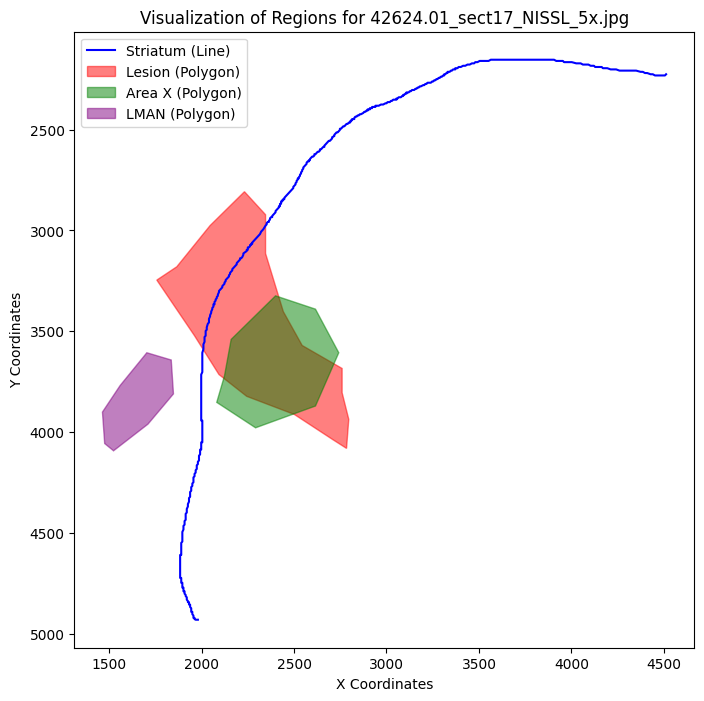

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # to convert coordinate strings to lists

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization
selected_row = df.iloc[6]  # You can change the index to visualize another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Plot the areas
plt.figure(figsize=(8, 8))
if striatum_x and striatum_y:
    plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
if lesion_x and lesion_y:
    plt.fill(lesion_x, lesion_y, label='Lesion (Polygon)', color='red', alpha=0.5)
if area_x_x and area_x_y:
    plt.fill(area_x_x, area_x_y, label='Area X (Polygon)', color='green', alpha=0.5)
if lman_x and lman_y:
    plt.fill(lman_x, lman_y, label='LMAN (Polygon)', color='purple', alpha=0.5)

# Customize plot
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
plt.show()


In [9]:
import pandas as pd

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for area calculation
selected_row = df.iloc[0]  # Change the index to calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Function to calculate the area of a polygon using the Shoelace formula
def calculate_polygon_area(x_coords, y_coords):
    if x_coords is None or y_coords is None:
        return 0
    n = len(x_coords)
    area = 0.5 * abs(sum(x_coords[i] * y_coords[(i + 1) % n] - y_coords[i] * x_coords[(i + 1) % n] for i in range(n)))
    return area

# Extract and parse the coordinates for each area
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Calculate areas
lesion_area = calculate_polygon_area(lesion_x, lesion_y)
area_x_area = calculate_polygon_area(area_x_x, area_x_y)
lman_area = calculate_polygon_area(lman_x, lman_y)

# Print the results
print(f"Lesion Area: {lesion_area}")
print(f"Area X Area: {area_x_area}")
print(f"LMAN Area: {lman_area}")


Lesion Area: 0
Area X Area: 0
LMAN Area: 0


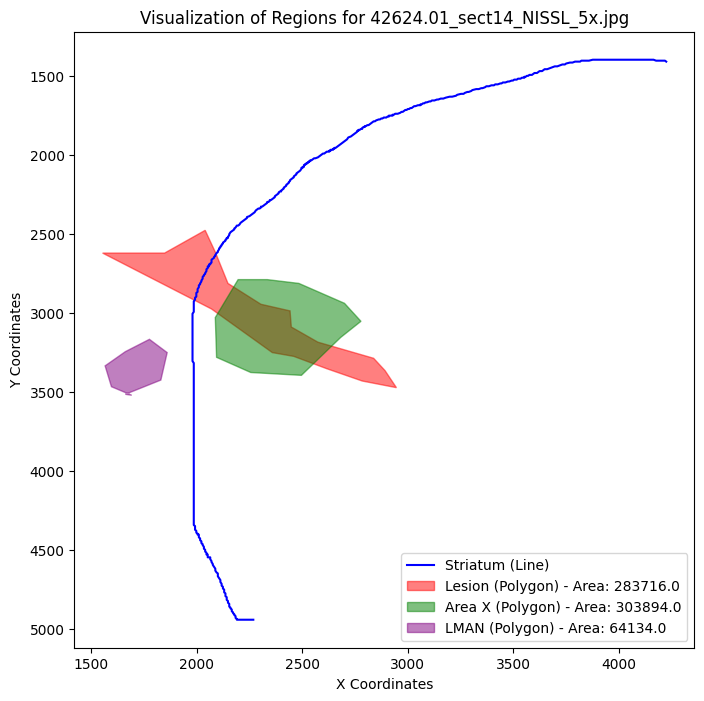

Lesion Area: 283716.0
Area X Area: 303894.0
LMAN Area: 64134.0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[4]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Function to calculate the area of a polygon using the Shoelace formula
def calculate_polygon_area(x_coords, y_coords):
    if x_coords is None or y_coords is None:
        return 0
    n = len(x_coords)
    area = 0.5 * abs(sum(x_coords[i] * y_coords[(i + 1) % n] - y_coords[i] * x_coords[(i + 1) % n] for i in range(n)))
    return area

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Calculate areas
lesion_area = calculate_polygon_area(lesion_x, lesion_y)
area_x_area = calculate_polygon_area(area_x_x, area_x_y)
lman_area = calculate_polygon_area(lman_x, lman_y)

# Plot the areas
plt.figure(figsize=(8, 8))
if striatum_x and striatum_y:
    plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
if lesion_x and lesion_y:
    plt.fill(lesion_x, lesion_y, label=f'Lesion (Polygon) - Area: {lesion_area}', color='red', alpha=0.5)
if area_x_x and area_x_y:
    plt.fill(area_x_x, area_x_y, label=f'Area X (Polygon) - Area: {area_x_area}', color='green', alpha=0.5)
if lman_x and lman_y:
    plt.fill(lman_x, lman_y, label=f'LMAN (Polygon) - Area: {lman_area}', color='purple', alpha=0.5)

# Customize plot
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
plt.show()

# Print the areas
print(f"Lesion Area: {lesion_area}")
print(f"Area X Area: {area_x_area}")
print(f"LMAN Area: {lman_area}")


Overlap Area between Lesion and Area X: 198587.16430828872


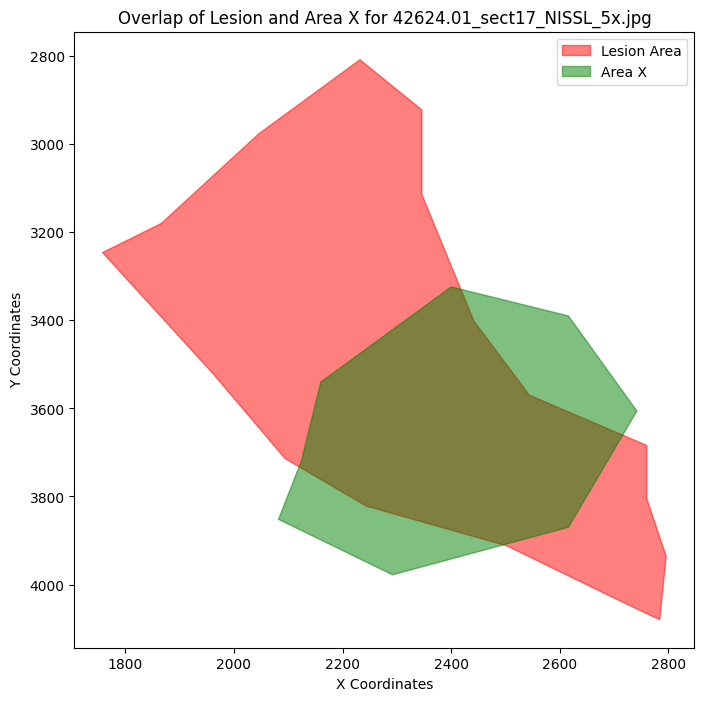

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])

# Create Polygon objects using Shapely if coordinates are present
lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None

# Calculate overlap area if both polygons exist
if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon):
    overlap_area = lesion_polygon.intersection(area_x_polygon).area
else:
    overlap_area = 0

# Print the overlap area
print(f"Overlap Area between Lesion and Area X: {overlap_area}")

# Optional: Plotting the regions with Shapely polygons to visualize the overlap
plt.figure(figsize=(8, 8))
if lesion_polygon:
    x, y = lesion_polygon.exterior.xy
    plt.fill(x, y, color='red', alpha=0.5, label='Lesion Area')
if area_x_polygon:
    x, y = area_x_polygon.exterior.xy
    plt.fill(x, y, color='green', alpha=0.5, label='Area X')
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Overlap of Lesion and Area X for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


## Calcualte LMAN and lesion overlap

Overlap Area between Lesion and Area X: 0
Overlap Area between Lesion and LMAN: 0


/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_86567/3346436160.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


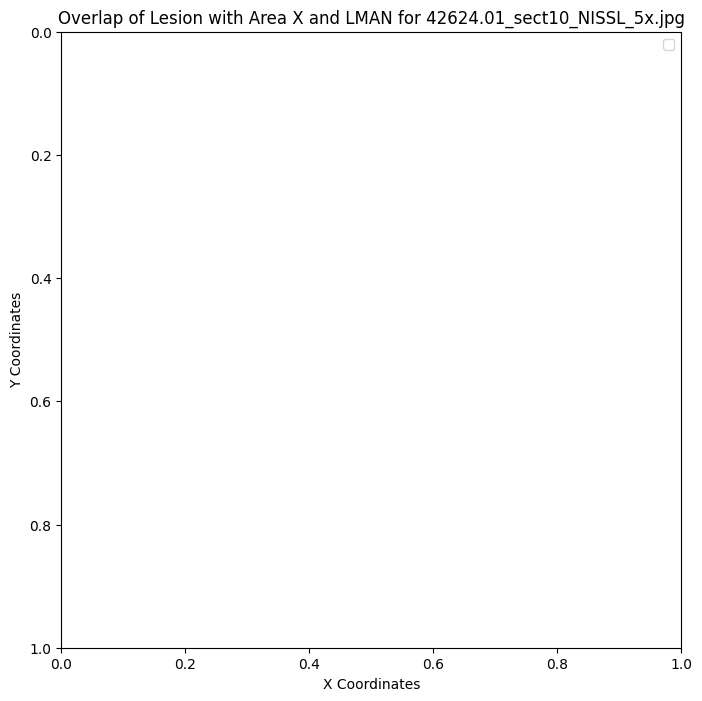

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[0]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Create Polygon objects using Shapely if coordinates are present
lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None

# Calculate overlap area for Lesion and Area X if both polygons exist
if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon):
    overlap_area_x = lesion_polygon.intersection(area_x_polygon).area
else:
    overlap_area_x = 0

# Calculate overlap area for Lesion and LMAN if both polygons exist
if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon):
    overlap_lman = lesion_polygon.intersection(lman_polygon).area
else:
    overlap_lman = 0

# Print the overlap areas
print(f"Overlap Area between Lesion and Area X: {overlap_area_x}")
print(f"Overlap Area between Lesion and LMAN: {overlap_lman}")

# Optional: Plotting the regions to visualize overlaps
plt.figure(figsize=(8, 8))
if lesion_polygon:
    x, y = lesion_polygon.exterior.xy
    plt.fill(x, y, color='red', alpha=0.5, label='Lesion Area')
if area_x_polygon:
    x, y = area_x_polygon.exterior.xy
    plt.fill(x, y, color='green', alpha=0.5, label='Area X')
if lman_polygon:
    x, y = lman_polygon.exterior.xy
    plt.fill(x, y, color='purple', alpha=0.5, label='LMAN')
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Overlap of Lesion with Area X and LMAN for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


## Calculate how much of the lesion was above and below the striatum

Lesion Area on one side of the Striatum: 171828.0
Lesion Area on the other side of the Striatum: 377406.0000000012


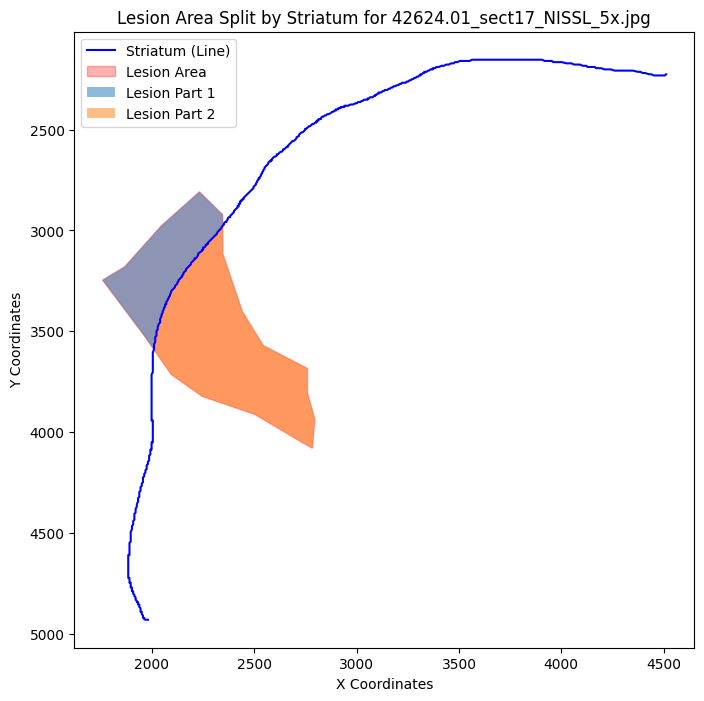

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import split

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])

# Create Polygon and LineString objects using Shapely
lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# Initialize variables for area calculation
area_side_1, area_side_2 = 0, 0

# Check if both the lesion polygon and striatum line are present
if lesion_polygon and striatum_line:
    # Check if the striatum line intersects the lesion polygon
    if lesion_polygon.intersects(striatum_line):
        # Split the lesion polygon by the striatum line
        split_polygons = split(lesion_polygon, striatum_line)
        
        # Check if the split result is not empty
        if not split_polygons.is_empty:
            # Calculate areas of each resulting polygon
            area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
        else:
            print("The split operation returned an empty result. No valid intersection.")
    else:
        print("The striatum line does not intersect the lesion polygon.")
else:
    print("Either the lesion polygon or the striatum line is missing for this image.")

# Print the areas on both sides of the striatum
print(f"Lesion Area on one side of the Striatum: {area_side_1}")
print(f"Lesion Area on the other side of the Striatum: {area_side_2}")

# Optional: Plotting to visualize the split
plt.figure(figsize=(8, 8))
# Plot striatum line
if striatum_line:
    x, y = striatum_line.xy
    plt.plot(x, y, color='blue', label='Striatum (Line)')
# Plot original lesion
if lesion_polygon:
    x, y = lesion_polygon.exterior.xy
    plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
# Plot split parts of lesion if they exist
if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
    for i, poly in enumerate(split_polygons.geoms):
        x, y = poly.exterior.xy
        plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


Lesion Area Part 1: 171828.0
Lesion Area Part 2: 377406.0000000012


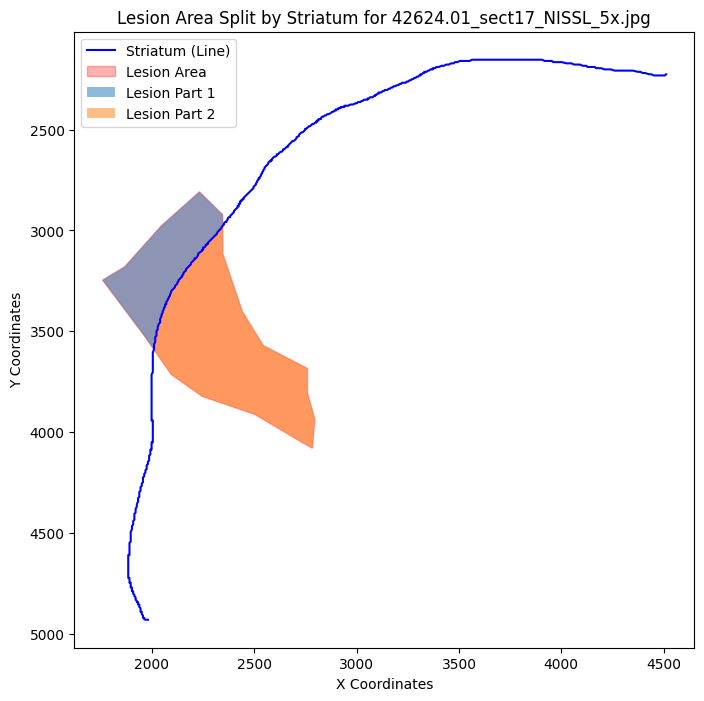

Lesion Area inside the Striatum (Posterior): 377406.0000000012
Lesion Area outside the Striatum (Anterior): 171828.0


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import split

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse the coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])

# Create Polygon and LineString objects using Shapely
lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# Initialize variables for area calculation
area_side_1, area_side_2 = 0, 0

# Check if both the lesion polygon and striatum line are present
if lesion_polygon and striatum_line:
    # Check if the striatum line intersects the lesion polygon
    if lesion_polygon.intersects(striatum_line):
        # Split the lesion polygon by the striatum line
        split_polygons = split(lesion_polygon, striatum_line)
        
        # Check if the split result is not empty and contains exactly two parts
        if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
            # Calculate areas of each resulting polygon
            area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
        else:
            print("The split operation returned an empty result or did not split into exactly two parts.")
    else:
        print("The striatum line does not intersect the lesion polygon.")
else:
    print("Either the lesion polygon or the striatum line is missing for this image.")

# Display areas to the user
print(f"Lesion Area Part 1: {area_side_1}")
print(f"Lesion Area Part 2: {area_side_2}")

# Plotting to visualize the split
plt.figure(figsize=(8, 8))
# Plot striatum line
if striatum_line:
    x, y = striatum_line.xy
    plt.plot(x, y, color='blue', label='Striatum (Line)')
# Plot original lesion
if lesion_polygon:
    x, y = lesion_polygon.exterior.xy
    plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
# Plot split parts of lesion
if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
    for i, poly in enumerate(split_polygons.geoms):
        x, y = poly.exterior.xy
        plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# Prompt the user to specify which part is within the striatum
striatum_part = input("Enter the part number (1 or 2) that is within the striatum: ")

# Determine and print areas based on the user's input
if striatum_part == '1':
    inside_area, outside_area = area_side_1, area_side_2
elif striatum_part == '2':
    inside_area, outside_area = area_side_2, area_side_1
else:
    print("Invalid input. Please enter 1 or 2.")
    inside_area, outside_area = 0, 0

print(f"Lesion Area inside the Striatum (Posterior): {inside_area}")
print(f"Lesion Area outside the Striatum (Anterior): {outside_area}")


# Combine the codes:

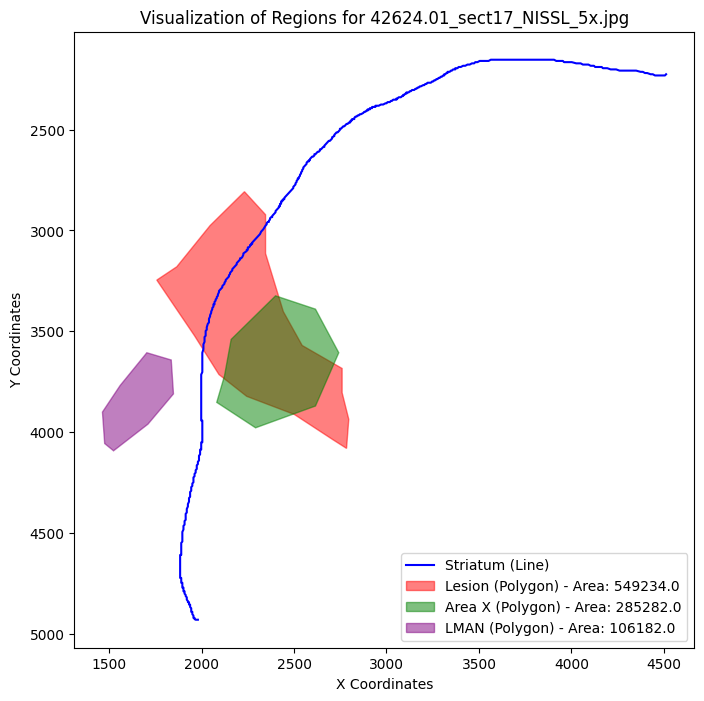

Lesion Area: 549234.0
Area X Area: 285282.0
LMAN Area: 106182.0
Overlap Area between Lesion and Area X: 198587.16430828872
Overlap Area between Lesion and LMAN: 0
Lesion Area Part 1: 171828.0
Lesion Area Part 2: 377406.0000000012


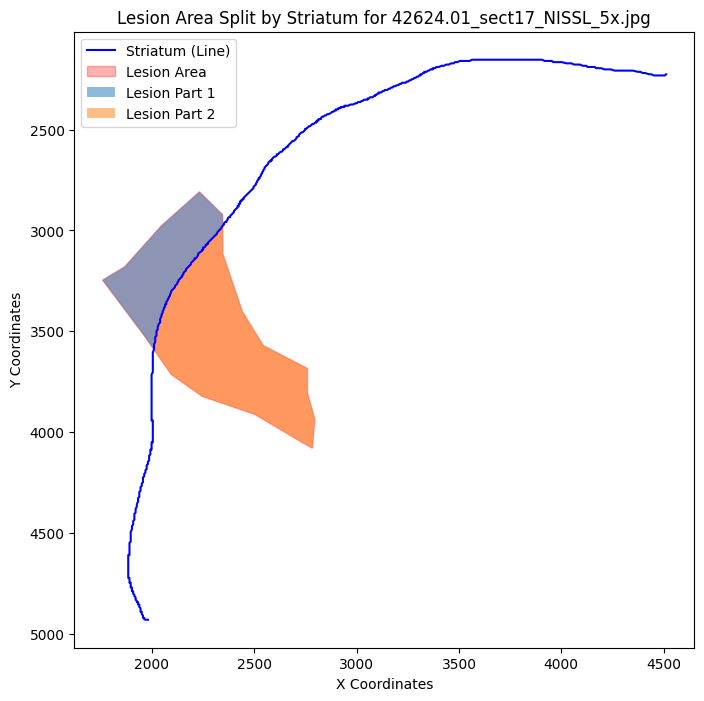

Lesion Area inside the Striatum (Posterior): 377406.0000000012
Lesion Area outside the Striatum (Anterior): 171828.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import split

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Select one image row for visualization and area calculation
selected_row = df.iloc[6]  # Change the index to visualize and calculate areas for another row if needed

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Extract and parse coordinates for each area
striatum_x = parse_coords(selected_row['Striatum_x_coords'])
striatum_y = parse_coords(selected_row['Striatum_y_coords'])
lesion_x = parse_coords(selected_row['Lesion_x_coords'])
lesion_y = parse_coords(selected_row['Lesion_y_coords'])
area_x_x = parse_coords(selected_row['Area_X_x_coords'])
area_x_y = parse_coords(selected_row['Area_X_y_coords'])
lman_x = parse_coords(selected_row['LMAN_x_coords'])
lman_y = parse_coords(selected_row['LMAN_y_coords'])

# Create Polygon and LineString objects using Shapely if coordinates are present
lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

# Calculate areas of individual polygons
lesion_area = lesion_polygon.area if lesion_polygon else 0
area_x_area = area_x_polygon.area if area_x_polygon else 0
lman_area = lman_polygon.area if lman_polygon else 0

# Plot the regions
plt.figure(figsize=(8, 8))
if striatum_x and striatum_y:
    plt.plot(striatum_x, striatum_y, label='Striatum (Line)', color='blue')
if lesion_polygon:
    x, y = lesion_polygon.exterior.xy
    plt.fill(x, y, label=f'Lesion (Polygon) - Area: {lesion_area}', color='red', alpha=0.5)
if area_x_polygon:
    x, y = area_x_polygon.exterior.xy
    plt.fill(x, y, label=f'Area X (Polygon) - Area: {area_x_area}', color='green', alpha=0.5)
if lman_polygon:
    x, y = lman_polygon.exterior.xy
    plt.fill(x, y, label=f'LMAN (Polygon) - Area: {lman_area}', color='purple', alpha=0.5)

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title(f"Visualization of Regions for {selected_row['Image Name']}")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y axis to match typical image coordinate systems
plt.show()

# Print individual polygon areas
print(f"Lesion Area: {lesion_area}")
print(f"Area X Area: {area_x_area}")
print(f"LMAN Area: {lman_area}")

# Calculate overlap area between lesion and Area X, if both are present
overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0
print(f"Overlap Area between Lesion and Area X: {overlap_area_x}")

# Calculate overlap area between lesion and LMAN, if both are present
overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0
print(f"Overlap Area between Lesion and LMAN: {overlap_area_lman}")

# If lesion and striatum are present, and they intersect, split the lesion by the striatum line
if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
    split_polygons = split(lesion_polygon, striatum_line)
    if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
        # Calculate areas of each resulting polygon part
        area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
        
        # Display areas of the split parts
        print(f"Lesion Area Part 1: {area_side_1}")
        print(f"Lesion Area Part 2: {area_side_2}")
        
        # Plot the split parts for user identification
        plt.figure(figsize=(8, 8))
        if striatum_line:
            x, y = striatum_line.xy
            plt.plot(x, y, color='blue', label='Striatum (Line)')
        if lesion_polygon:
            x, y = lesion_polygon.exterior.xy
            plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
        for i, poly in enumerate(split_polygons.geoms):
            x, y = poly.exterior.xy
            plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
        plt.xlabel("X Coordinates")
        plt.ylabel("Y Coordinates")
        plt.title(f"Lesion Area Split by Striatum for {selected_row['Image Name']}")
        plt.legend()
        plt.gca().invert_yaxis()
        plt.show()

        # Prompt the user to specify which part is within the striatum
        striatum_part = input("Enter the part number (1 or 2) that is within the striatum: ")

        # Determine and print areas based on the user's input
        if striatum_part == '1':
            inside_area, outside_area = area_side_1, area_side_2
        elif striatum_part == '2':
            inside_area, outside_area = area_side_2, area_side_1
        else:
            print("Invalid input. Please enter 1 or 2.")
            inside_area, outside_area = 0, 0

        print(f"Lesion Area inside the Striatum (Posterior): {inside_area}")
        print(f"Lesion Area outside the Striatum (Anterior): {outside_area}")
    else:
        print("The split operation did not return exactly two parts.")
else:
    print("Either the lesion polygon or striatum line is missing, or they do not intersect.")


## Now, update the code to iterate over each row from the .csv, and save the data into dataframes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import split

# Load the CSV data into a DataFrame
csv_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/Histology_analysis/inputs/USA5288_042624.01_ROIs/42624.01_nuclei_and_lesion_traces.csv'
df = pd.read_csv(csv_path)

# Helper function to convert coordinates from strings to lists
def parse_coords(coord_string):
    if coord_string.lower() == "none present":
        return None
    return [int(coord) for coord in coord_string.split(",")]

# Initialize an empty list to store results
results = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract and parse coordinates for each area
    striatum_x = parse_coords(row['Striatum_x_coords'])
    striatum_y = parse_coords(row['Striatum_y_coords'])
    lesion_x = parse_coords(row['Lesion_x_coords'])
    lesion_y = parse_coords(row['Lesion_y_coords'])
    area_x_x = parse_coords(row['Area_X_x_coords'])
    area_x_y = parse_coords(row['Area_X_y_coords'])
    lman_x = parse_coords(row['LMAN_x_coords'])
    lman_y = parse_coords(row['LMAN_y_coords'])

    # Create Polygon and LineString objects using Shapely if coordinates are present
    lesion_polygon = Polygon(zip(lesion_x, lesion_y)) if lesion_x and lesion_y else None
    area_x_polygon = Polygon(zip(area_x_x, area_x_y)) if area_x_x and area_x_y else None
    lman_polygon = Polygon(zip(lman_x, lman_y)) if lman_x and lman_y else None
    striatum_line = LineString(zip(striatum_x, striatum_y)) if striatum_x and striatum_y else None

    # Calculate areas of individual polygons
    lesion_area = lesion_polygon.area if lesion_polygon else 0
    area_x_area = area_x_polygon.area if area_x_polygon else 0
    lman_area = lman_polygon.area if lman_polygon else 0

    # Calculate overlap area between lesion and Area X, if both are present
    overlap_area_x = lesion_polygon.intersection(area_x_polygon).area if lesion_polygon and area_x_polygon and lesion_polygon.intersects(area_x_polygon) else 0

    # Calculate overlap area between lesion and LMAN, if both are present
    overlap_area_lman = lesion_polygon.intersection(lman_polygon).area if lesion_polygon and lman_polygon and lesion_polygon.intersects(lman_polygon) else 0

    # Initialize variables for split areas if striatum and lesion are present
    inside_area, outside_area = 0, 0

    # If lesion and striatum are present, and they intersect, split the lesion by the striatum line
    if lesion_polygon and striatum_line and lesion_polygon.intersects(striatum_line):
        split_polygons = split(lesion_polygon, striatum_line)
        if not split_polygons.is_empty and len(split_polygons.geoms) == 2:
            # Calculate areas of each resulting polygon part
            area_side_1, area_side_2 = [poly.area for poly in split_polygons.geoms]
            
            # Plot the split parts for user identification
            plt.figure(figsize=(8, 8))
            if striatum_line:
                x, y = striatum_line.xy
                plt.plot(x, y, color='blue', label='Striatum (Line)')
            if lesion_polygon:
                x, y = lesion_polygon.exterior.xy
                plt.fill(x, y, color='red', alpha=0.3, label='Lesion Area')
            for i, poly in enumerate(split_polygons.geoms):
                x, y = poly.exterior.xy
                plt.fill(x, y, alpha=0.5, label=f'Lesion Part {i+1}')
            plt.xlabel("X Coordinates")
            plt.ylabel("Y Coordinates")
            plt.title(f"Lesion Area Split by Striatum for {row['Image Name']}")
            plt.legend()
            plt.gca().invert_yaxis()
            plt.show()

            # Prompt the user to specify which part is within the striatum
            striatum_part = input(f"Enter the part number (1 or 2) that is within the striatum for {row['Image Name']}: ")

            # Determine areas based on the user's input
            if striatum_part == '1':
                inside_area, outside_area = area_side_1, area_side_2
            elif striatum_part == '2':
                inside_area, outside_area = area_side_2, area_side_1
            else:
                print("Invalid input. Setting inside and outside areas to 0.")

    # Append the results for the current row to the results list
    results.append({
        "Image Name": row['Image Name'],
        "Lesion Area": lesion_area,
        "Area X Area": area_x_area,
        "LMAN Area": lman_area,
        "Overlap Area with Area X": overlap_area_x,
        "Overlap Area with LMAN": overlap_area_lman,
        "Lesion Area inside Striatum (Posterior)": inside_area,
        "Lesion Area outside Striatum (Anterior)": outside_area
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the results DataFrame to a CSV file
results_df.to_csv('lesion_analysis_results.csv', index=False)

print("Analysis complete. Results saved to 'lesion_analysis_results.csv'.")
